In [39]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [40]:
imBGR = cv2.imread('images/lines.jpg')
imGray = cv2.cvtColor(imBGR, cv2.COLOR_BGR2GRAY)
imRGB = cv2.cvtColor(imBGR, cv2.COLOR_BGR2RGB)

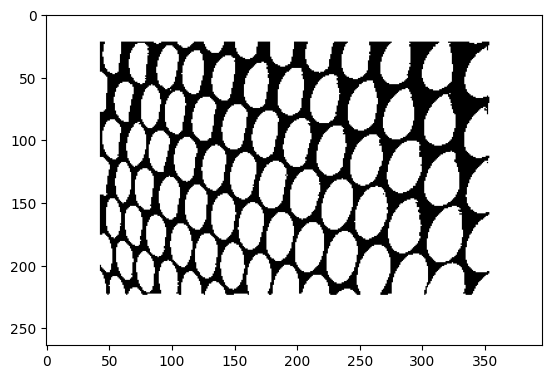

In [41]:
ret, thresh = cv2.threshold(imGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()


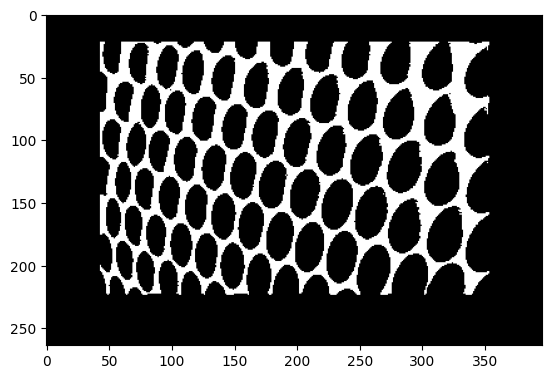

In [42]:
ret, thresh = cv2.threshold(imGray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

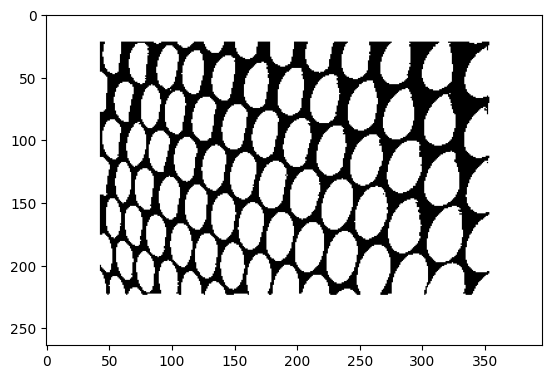

{'m00': 333.5, 'm10': 26357.833333333332, 'm01': 68305.83333333333, 'm20': 2087021.25, 'm11': 5400038.625, 'm02': 14011278.916666666, 'm30': 165554633.95000002, 'm21': 427698348.48333335, 'm12': 1108007816.9833333, 'm03': 2878420472.9500003, 'mu20': 3856.6981925703585, 'mu11': 1556.553952191025, 'mu02': 21213.34736798331, 'mu30': -588.499710559845, 'mu21': -1143.1056243050843, 'mu12': 3025.672950670356, 'mu03': 9458.832460403442, 'nu20': 0.034675599464768586, 'nu11': 0.013994987083888565, 'nu02': 0.19072934928023222, 'nu30': -0.00028973880057589957, 'nu21': -0.0005627905104705057, 'nu12': 0.0014896436411637355, 'nu03': 0.004656910993751433}
{'m00': 508.5, 'm10': 75493.83333333333, 'm01': 101871.16666666666, 'm20': 11218418.416666666, 'm11': 15123913.625, 'm02': 20449767.75, 'm30': 1668591869.95, 'm21': 2247379619.5166664, 'm12': 3035946914.15, 'm03': 4113368639.55, 'mu20': 10318.37465858087, 'mu11': -265.0924150533974, 'mu02': 41243.466759536415, 'mu30': -770.2170052528381, 'mu21': -15

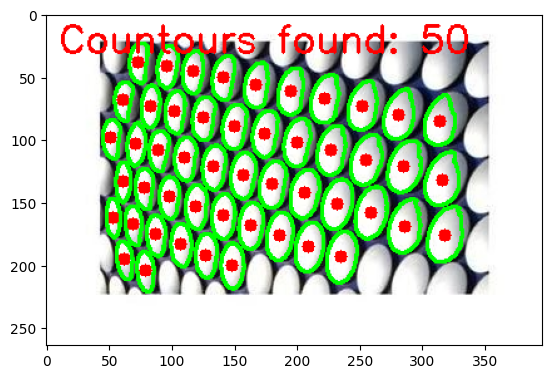

In [52]:
output = imRGB.copy()
ret, thresh = cv2.threshold(imGray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')
plt.show()

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

newCountorus = []

for c in contours:
    area = cv2.contourArea(c)
    if area < 1000 and area > 100:
        M = cv2.moments(c)
        print(M)
        cX = int(M['m10'] / M['m00'])
        cY = int(M['m01'] / M['m00'])
        cv2.circle(imRGB, (cX, cY), 1, (255,0,0), -1)
        newCountorus.append(c)

cv2.drawContours(output, newCountorus, -1, (0,255,0), 2)
cv2.putText(output, f"Countours found: {len(newCountorus)}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

plt.imshow(output)
